# Understanding Wine Attributes and Properties

### Acidity
Acidity in food and drink tastes tart and zesty. 
### fixed acidity
Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes.
### volatile acidity
These acids are to be distilled out from the wine before completing the production process. 
### citric acid 
This is one of the fixed acids which gives a wine its freshness. 
### residual sugar
This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.
### chlorides
Chloride concentration in the wine is influenced by terroir.This is usually a major contributor to saltiness in wine.
### sulphates
These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are connected to the fermentation process and affects the wine aroma and flavor.
### free sulfur dioxide
This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. 
### total sulfur dioxide
This is the sum total of the bound and the free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness.
### density
This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.
### pH 
Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines.
### alcohol
It's usually measured in % vol or alcohol by volume.
### quality
Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import numpy as np
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\yalit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("/Users/yalit/Documents/Ariel/2018-2019 B/Data Visualization/Project/winequalityN.csv")
data = data.dropna(axis=0)
class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(data.type.values) # 1 - White; 0 - Red
data['color'] = y_tp
data = data.sample(frac=1, random_state=101).reset_index(drop=True)
data = data.dropna(axis=0)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,white,5.8,0.120,0.21,1.3,0.056,35.0,121.0,0.99080,3.32,0.33,11.4,6,1
1,white,8.4,0.270,0.46,8.7,0.048,39.0,197.0,0.99740,3.14,0.59,9.6,6,1
2,white,6.6,0.285,0.49,11.4,0.035,57.0,137.0,0.99732,3.08,0.54,8.9,6,1
3,white,7.7,0.300,0.42,14.3,0.045,45.0,213.0,0.99910,3.18,0.63,9.2,5,1
4,white,5.6,0.200,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.0,6,1


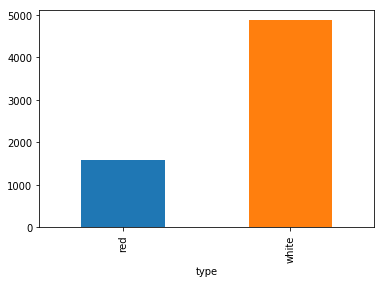

In [3]:
data.groupby('type')['quality'].count().plot(kind='bar')


In [4]:
subset_attributes = data.columns
rs = round(data.loc[data.type == 'red', subset_attributes].describe(),2)
ws = round(data.loc[data.type == 'white', subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics'])

fixed acidity  volatile acidity  citric acid  \
Red Wine Statistics   count        1593.00           1593.00      1593.00   
                      mean            8.33              0.53         0.27   
                      std             1.74              0.18         0.19   
                      min             4.60              0.12         0.00   
                      25%             7.10              0.39         0.09   
                      50%             7.90              0.52         0.26   
                      75%             9.20              0.64         0.42   
                      max            15.90              1.58         1.00   
White Wine Statistics count        4870.00           4870.00      4870.00   
                      mean            6.86              0.28         0.33   
                      std             0.84              0.10         0.12   
                      min             3.80              0.08         0.00   
                      25%             6.30              0.21         0.27   
                      50%             6.80              0.26         0.32   
                      75%             7.30              0.32         0.39   
                      max            14.20              1.10         1.66   

                             residual sugar  chlorides  free sulfur dioxide  \
Red Wine Statistics   count         1593.00    1593.00              1593.00   
                      mean             2.54       0.09                15.84   
                      std              1.41       0.05                10.44   
                      min              0.90       0.01                 1.00   
                      25%              1.90       0.07                 7.00   
                      50%              2.20       0.08                14.00   
                      75%              2.60       0.09                21.00   
                      max             15.50       0.61                72.00   
White Wine Statistics count         4870.00    4870.00              4870.00   
                      mean             6.39       0.05                35.32   
                      std              5.07       0.02                17.01   
                      min              0.60       0.01                 2.00   
                      25%              1.70       0.04                23.00   
                      50%              5.20       0.04                34.00   
                      75%              9.90       0.05                46.00   
                      max             65.80       0.35               289.00   

                             total sulfur dioxide  density       pH  \
Red Wine Statistics   count               1593.00  1593.00  1593.00   
                      mean                  46.46     1.00     3.31   
                      std                   32.91     0.00     0.15   
                      min                    6.00     0.99     2.74   
                      25%                   22.00     1.00     3.21   
                      50%                   38.00     1.00     3.31   
                      75%                   62.00     1.00     3.40   
                      max                  289.00     1.00     4.01   
White Wine Statistics count               4870.00  4870.00  4870.00   
                      mean                 138.34     0.99     3.19   
                      std                   42.49     0.00     0.15   
                      min                    9.00     0.99     2.72   
                      25%                  108.00     0.99     3.09   
                      50%                  134.00     0.99     3.18   
                      75%                  167.00     1.00     3.28   
                      max                  440.00     1.04     3.82   

                             sulphates  alcohol  quality   color  
Red Wine Statistics   count    1593.00  1593.00  1593.00  1593.0  
                      mean       

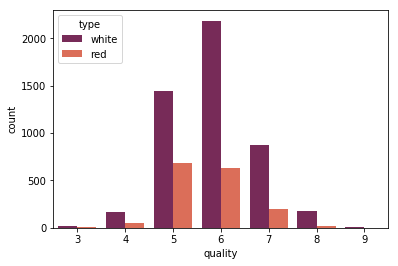

In [5]:
sns.countplot(x = data.quality, data=data, hue='type', palette="rocket")

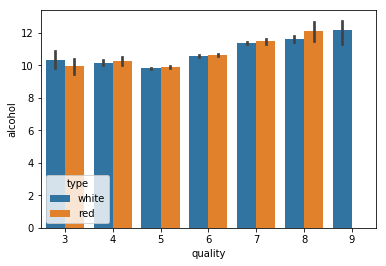

In [6]:
sns.barplot(x='quality', y = 'alcohol', hue = 'type' , data = data)

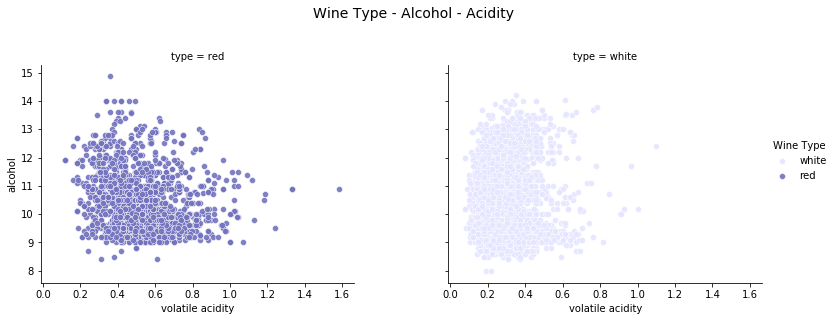

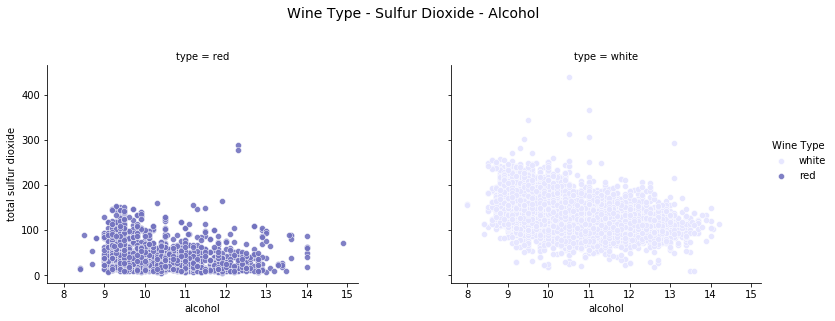

In [7]:
g = sns.FacetGrid(data, col='type', hue='type', col_order=['red', 'white'],
                  aspect=1.2, size=4.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, 'volatile acidity', 'alcohol', alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Acidity', fontsize=14)
l = g.add_legend(title='Wine Type')

g = sns.FacetGrid(data, col='type', hue='type', col_order=['red', 'white'],
                  aspect=1.2, size=4.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, 'alcohol', 'total sulfur dioxide', alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Alcohol', fontsize=14)
l = g.add_legend(title='Wine Type')

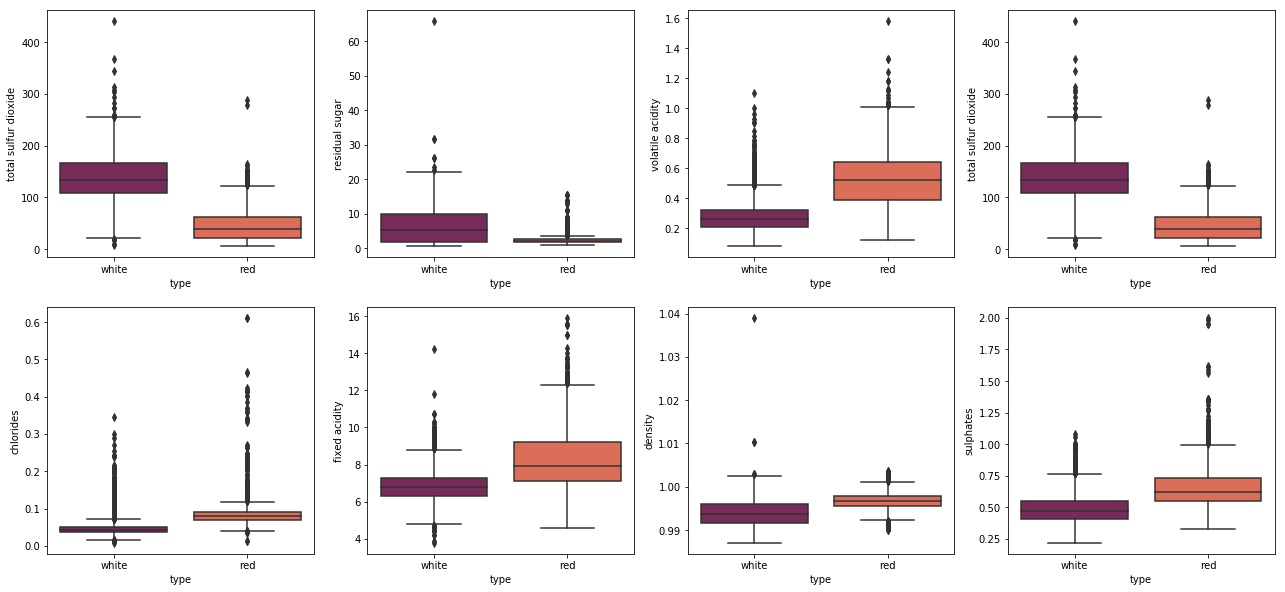

In [8]:
fig = plt.figure(figsize=(22,10))
features = ["total sulfur dioxide", "residual sugar", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity", "density","sulphates"]

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.boxplot(x="type", y=features[i],data=data, palette="rocket");
    

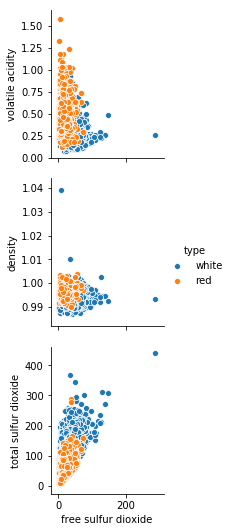

In [9]:
sns.pairplot(data,hue = 'type',x_vars = ['free sulfur dioxide'],y_vars = ['volatile acidity','density','total sulfur dioxide'])

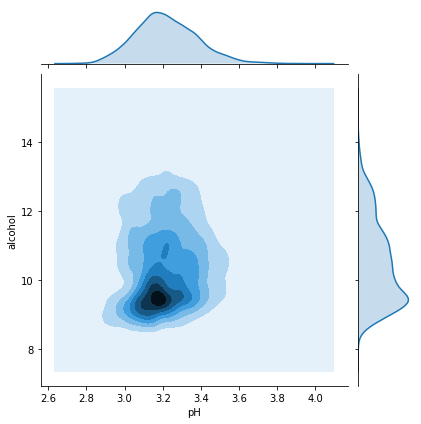

In [10]:
sns.jointplot(x='pH', y = 'alcohol',kind='kde',data = data)

In [11]:
x = data.drop(['type'],axis=1)
y = data.type
x_train , x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=101)

## PCA

In [12]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.reset_index(drop=True, inplace=True)
final = pd.concat([principalDf, y_train.reset_index(drop=True)],axis=1)
final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,type
0,126.869807,9.868760,8.616537,0.457826,0.816925,-0.080684,0.320857,-0.057364,-0.010181,-0.003202,-0.142136,-0.002551,3.394305e-07,white
1,25.206001,-0.465592,-4.960626,-0.525842,-0.332198,-0.155657,0.011604,0.097909,-0.274808,-0.001360,-0.036569,-0.008072,-1.272398e-04,white
2,-11.201303,1.984391,-3.976950,-0.259251,-0.261973,0.991577,-0.381783,0.028349,0.075216,-0.094738,-0.067438,-0.016774,-1.906414e-04,white
3,2.123646,-3.936964,5.027280,-2.087798,-0.275287,-0.830401,0.029624,-0.057818,-0.133431,-0.142988,0.010729,0.002814,-8.349159e-05,white
4,-110.498857,-1.150986,0.840277,1.080936,-1.570257,-0.172097,0.134895,-0.231900,-0.088663,-0.034205,-0.010934,-0.043648,-7.671474e-04,red


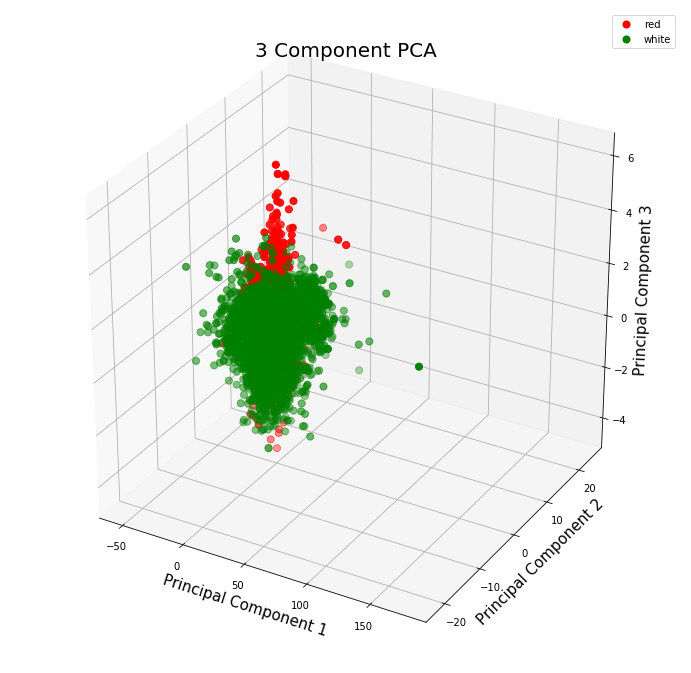

In [13]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


targets = ['red', 'white', 'Spontan']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final['type'] == target
    ax.scatter(final.loc[indicesToKeep, 1]
               , final.loc[indicesToKeep, 2]
               , final.loc[indicesToKeep, 3]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Modles

## Null Classifer

In [14]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy="uniform")
dummy_classifier.fit(x_train, y_train)
print(dummy_classifier.score(x_test,y_test))
y_pred = dummy_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

0.4997421351211965
             precision    recall  f1-score   support

        red       0.26      0.50      0.34       497
      white       0.75      0.52      0.61      1442

avg / total       0.63      0.51      0.54      1939



## KNN

Text(0,0.5,'Cross-Validated Accuracy')

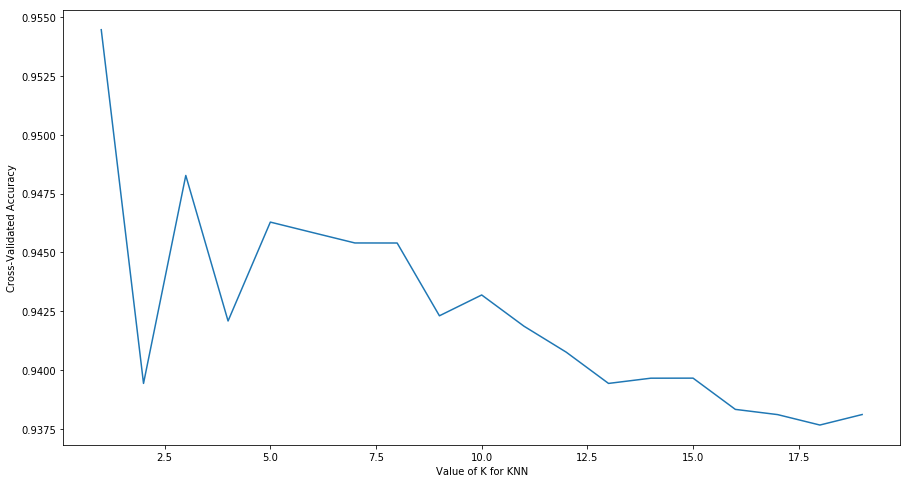

In [15]:
# search for an optimal value of K for KNN
k_range = list(range(1,20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(15,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

0.9437854564208354


Text(33,0.5,'actual')

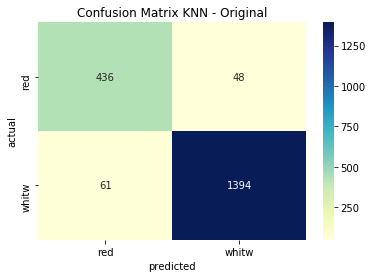

In [16]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
print(knn.score(x_test,y_test))
y_pred = knn.predict(x_test)
matrix = metrics.confusion_matrix(y_pred, y_test)
matrix = pd.DataFrame(matrix, columns = ['red', 'whitw'],index = ['red', 'whitw'])
sns.heatmap(matrix,annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix KNN - Original')
plt.xlabel('predicted')
plt.ylabel('actual')

## Ada Boost


In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=10, max_depth=5,random_state=1,n_jobs=-1), n_estimators=45, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(clf.score(x_test,y_test))
print(classification_report(y_test, y_pred))

1.0
             precision    recall  f1-score   support

        red       1.00      1.00      1.00       497
      white       1.00      1.00      1.00      1442

avg / total       1.00      1.00      1.00      1939



## Navie bayes


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        red       1.00      1.00      1.00       497
      white       1.00      1.00      1.00      1442

avg / total       1.00      1.00      1.00      1939



## ICA trail

In [19]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=18)
x_t_train = transformer.fit_transform(x_train)
x_t_test = transformer.fit_transform(x_test)
clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=5, max_depth=5,random_state=1,n_jobs=-1), n_estimators=45, random_state=0)
clf.fit(x_t_train, y_train)
clf.score(x_t_test, y_test)

0.7297576070139247